In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as cl

In [25]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1.0


In [26]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [27]:
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [28]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2922.000000,2922.000000,2922.000000
mean,1157.248375,-0.334017,0.295477,0.845482,0.102388,-0.084588,0.041536,0.125553,-0.078615,0.039314,0.001845,0.096922,0.281911,-0.145154,-0.127390,0.219544,-0.122964,-0.086597,-0.135155,0.052412,0.054122,0.022294,-0.140314,-0.042219,0.013856,0.100449,0.031599,0.045141,0.001299,67.955986,0.221766
std,704.290301,1.393153,1.223387,0.986023,1.324235,1.237915,1.277126,1.121500,1.147635,0.912087,0.983348,1.004229,0.646198,0.914788,0.754502,0.898793,0.780415,0.682486,0.738647,0.777237,0.591627,0.833485,0.618648,0.354303,0.595526,0.409030,0.478827,0.357938,0.265467,235.093423,0.415506
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-8.945496,-19.176657,-3.110515,-3.563578,-2.595325,-2.899907,-3.389510,-6.576789,-3.618060,-3.826098,-5.400014,-3.890140,-3.718810,-11.748689,-4.709977,-4.432106,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.909294,0.000000,0.000000
25%,550.000000,-1.088167,-0.180548,0.290367,-0.762449,-0.603171,-0.714916,-0.311558,-0.197142,-0.479566,-0.469595,-0.645671,-0.141010,-0.779281,-0.407949,-0.360722,-0.620423,-0.501040,-0.554890,-0.426369,-0.133650,-0.225683,-0.547154,-0.187037,-0.358373,-0.148071,-0.302827,-0.042663,-0.017615,3.817500,0.000000
50%,1135.000000,-0.458705,0.357519,0.868256,0.140817,-0.140202,-0.209263,0.122413,0.028133,0.010309,-0.109646,0.011709,0.299444,-0.108997,-0.022669,0.321341,-0.039753,-0.142909,-0.118506,0.040823,0.007720,-0.080783,-0.143518,-0.058762,0.089264,0.118704,0.021763,0.029386,0.022927,13.990000,0.000000
75%,1712.000000,1.086080,0.950014,1.455047,1.002457,0.374203,0.421043,0.593711,0.287463,0.541219,0.329604,0.930438,0.732260,0.497013,0.312448,0.876787,0.425525,0.250807,0.272620,0.533939,0.175778,0.089006,0.284397,0.070922,0.423843,0.370447,0.307106,0.184856,0.093151,56.965000,0.000000
max,2471.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,11.906868,3.702177,2.313066,3.182541,2.146962,3.635042,4.087802,4.072972,2.689762,3.097749,7.744222,14.718212,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.000000


In [29]:
df.drop(['Time'],axis=1,inplace=True)
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [31]:
df['Class'].value_counts()

0.0    2274
1.0     648
Name: Class, dtype: int64

In [32]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))


Total number of Trnsactions are 2922
Number of Normal Transactions are 2274
Number of fraudulent Transactions are 648
Percentage of fraud Transactions is 28.5


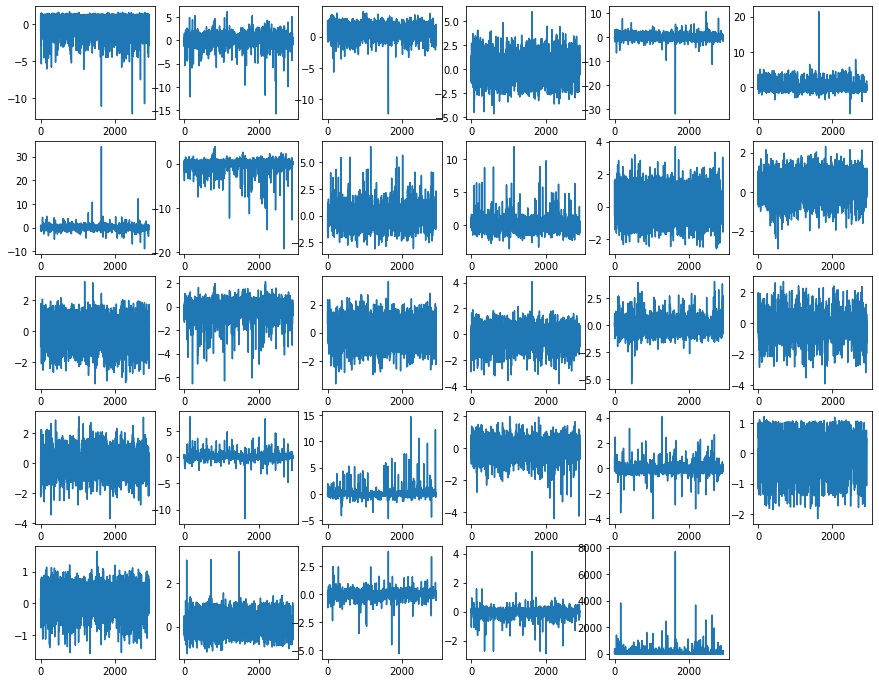

In [33]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

In [34]:
feature_names = df.iloc[:, 1:30].columns

X=df[feature_names]
X=np.nan_to_num(X)
y=df['Class'].values

In [35]:
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()

claus=scale.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 2045
Length of X_test is: 877
Length of y_train is: 2045
Length of y_test is: 877


In [37]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
yhat=lr.predict(X_test)
yhat_prob=lr.predict_proba(X_test)

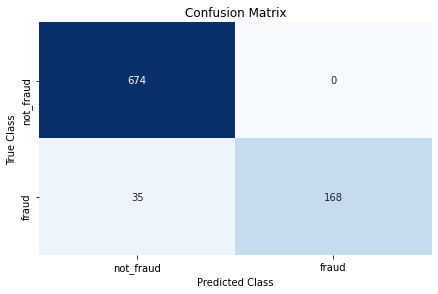

In [39]:
from sklearn.metrics import confusion_matrix
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test,yhat)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [40]:
from sklearn.metrics import jaccard_score,log_loss
print("Jaccard_score is ",jaccard_score(y_test,yhat,pos_label=0))
print("log_loss is ",log_loss(y_test,yhat_prob,))

Jaccard_score is  0.9506346967559943
log_loss is  0.2755473215422135


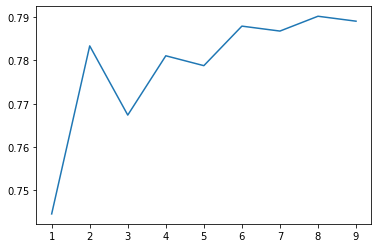

In [41]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))

for n in range(1,ks):
  neigh=KNC(n_neighbors=n).fit(X_train,y_train)
  yhat=neigh.predict(X_test)
  mean_acc[n-1]=accuracy_score(y_test,yhat)
mean_acc

plt.plot(range(1,ks),mean_acc)
plt.show()


In [50]:
k=8
neigh1=KNC(n_neighbors=k).fit(X_train,y_train)
yhat1=neigh1.predict(X_test)
yhat1[0:5]


array([0., 0., 0., 0., 0.])

In [52]:
from sklearn.metrics import accuracy_score,jaccard_score
print(accuracy_score(y_test,yhat))
print("Jaccard_score is ",jaccard_score(y_test,yhat,pos_label=0))

0.7890535917901939
Jaccard_score is  0.7813238770685579
